## Digital Assignment -1

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np

from ydata_profiling import ProfileReport
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
df_data = pd.read_csv("online_shoppers_intention.csv")
df_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### (EDA) Exploratory Data Analysis

In [3]:
# Get the info (column number and name, non-null count, and dtype) for each column in the training df
df_data.info()
# Get summary statistics for the training df with the describe() method
df_data.describe(percentiles=[0.01, 0.05, 0.1, 0.25,0.5,0.75,0.9,0.95,0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.00000,0.000000,0.000000,0.000000,1.000000,4.000000,7.000000,9.000000,14.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.00000,0.000000,0.000000,0.000000,7.500000,93.256250,224.887500,348.266369,830.587041,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,6.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,195.000000,716.390000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,1.00000,1.000000,3.000000,7.000000,18.000000,38.000000,74.000000,109.000000,221.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,0.00000,0.000000,36.000000,184.137500,598.936905,1464.157214,2877.863333,4300.289077,8701.142697,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.00000,0.000000,0.000000,0.000000,0.003112,0.016813,0.058197,0.200000,0.200000,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.00125,0.004568,0.007449,0.014286,0.025156,0.050000,0.100000,0.200000,0.200000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,18.855502,38.160528,85.498490,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.600000,1.000000,1.000000


In [4]:
#look at categorical columns: Administrative, Informational, ProductRelated
df_data['ProductRelated'].value_counts()

1      622
2      465
3      458
4      404
6      396
      ... 
243      1
409      1
262      1
414      1
192      1
Name: ProductRelated, Length: 311, dtype: int64

### Non-numerical feature data definitions and value distributions

In [5]:
#Look at label distribution
df_data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

<AxesSubplot: >

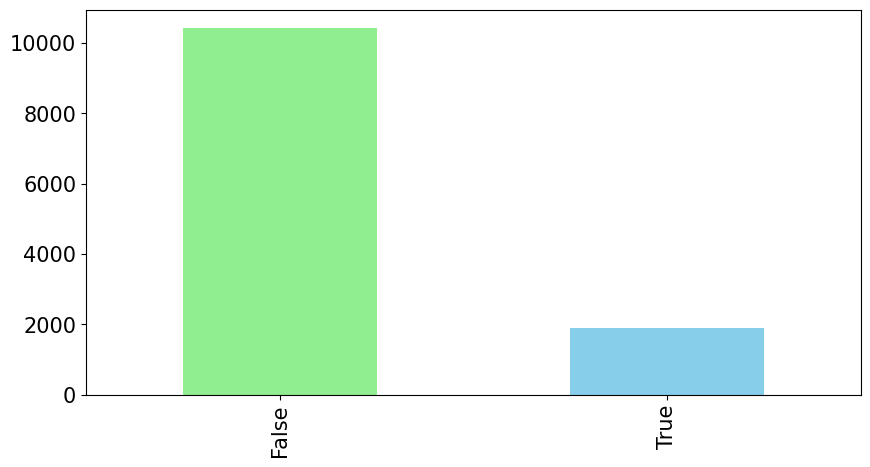

In [6]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (10, 5)

df_data['Revenue'].value_counts().plot(kind = 'bar', color = ['lightgreen', 'skyblue'], fontsize = 15)

In [7]:
#Inspect the unique values of the non-numeric columns, and their counts
print('VisitorType')
print(df_data['VisitorType'].value_counts())
print("\n\nMonth:")
print(df_data['Month'].value_counts())

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


Month:
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


## Plots

In [8]:
numeric_columns = [c for c in df_data.columns if df_data[c].dtype not in ["bool", "object"]]

<AxesSubplot: >

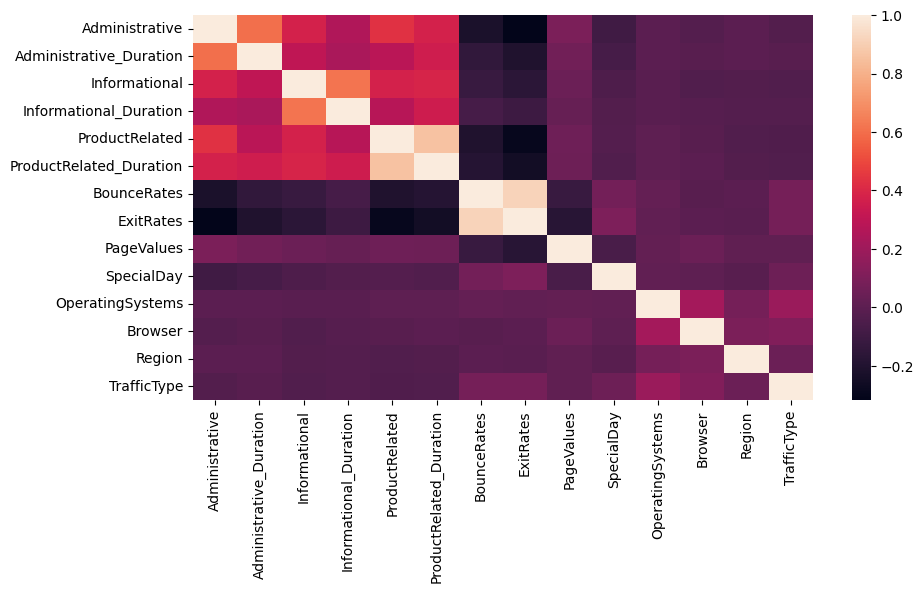

In [9]:
# correlation plot
corr = df_data[numeric_columns].corr()
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values)

##### Conclusion: 
High correlation is seen in the plots for "BounceRates"+"ExitRates" and "ProductRelated"+"ProductRelated Duration," which also display similar patterns when paired with other features.

Hence one in each pair can be excluded from the analysis.
We selected "ExitRates" and "ProductRelated_Duration" for classification. 

In [12]:
#delete highly correlated features
del df_data['BounceRates']
del df_data['ProductRelated']

### Conclusion
Although there is no clear distinction between these category traits and Revenue, it is still important to look into whether they could be signs of a purchase.

#Prepare data for analysis

In [13]:
#Map the months from strings to integers, with 1 corresponding to January, etc.
month_mapping = {'Jan':1,
                 'Feb':2,
                 'Mar':3,
                 'Apr':4,
                 'May':5,
                 'June':6,
                 'Jul':7,
                 'Aug':8,
                 'Sep':9,
                 'Oct':10,
                 'Nov':11,
                 'Dec':12}
# Map the months
df_data['Month'] = df_data['Month'].map(month_mapping)

df_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,0.000000,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,64.000000,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,0.000000,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2.666667,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,627.500000,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,True,False


In [14]:
#One-hot encode the categorical features
categorical_columns = ['SpecialDay', 'OperatingSystems', 'Browser', 
                       'Region', 'TrafficType', 'VisitorType',
                      'Weekend']
for column in categorical_columns:
      df_data[column] = df_data[column].apply(str)

df_dummies = pd.get_dummies(df_data[categorical_columns], drop_first=True)

df_data = df_data.drop(categorical_columns, axis=1)
df_data = pd.concat([df_data, df_dummies], axis=1)
df_data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated_Duration', 'ExitRates',
       'PageValues', 'Month', 'Revenue', 'SpecialDay_0.2', 'SpecialDay_0.4',
       'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5',
       'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_2',
       'TrafficType_20', 'TrafficType_3', 'Traffic

In [15]:
df_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,Month,Revenue,SpecialDay_0.2,...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,0.000000,0.20,0.0,2,False,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,64.000000,0.10,0.0,2,False,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.0,0,0.0,0.000000,0.20,0.0,2,False,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2.666667,0.14,0.0,2,False,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0.0,0,0.0,627.500000,0.05,0.0,2,False,0,...,0,1,0,0,0,0,0,0,1,1


In [16]:
#Split data on train and test (Train data entries corresponding to the months of June-Dec, and test data entries corresponding to Feb-March.)
df_train = df_data[df_data['Month'] >= 6]
df_test = df_data[(df_data['Month'] >= 2) & (df_data['Month'] <= 3)]
len(df_train), len(df_test)

(6875, 2091)

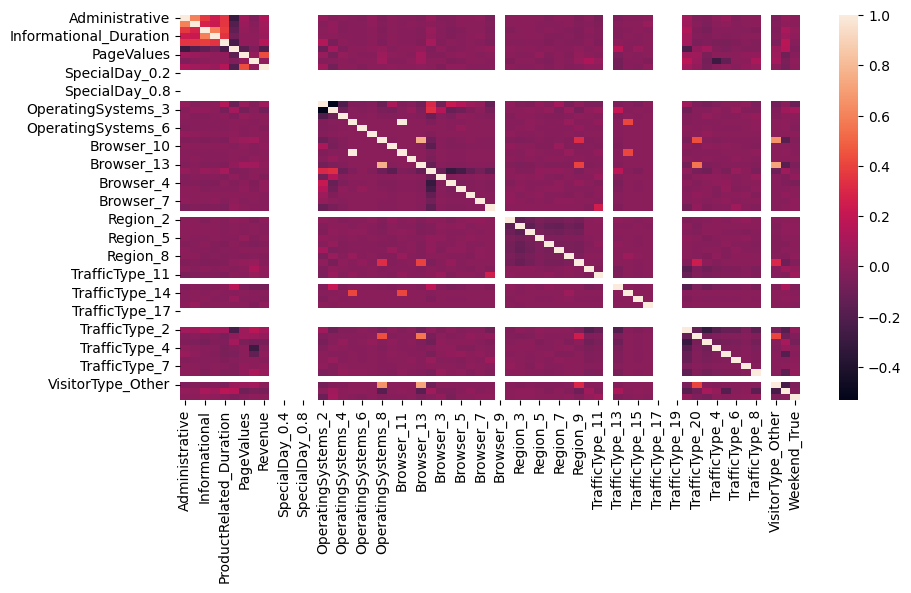

In [17]:
# Compute the Pearson Correlation of each feature and vizualise it
cor = df_train.corr()
sns.heatmap(cor)
plt.show()

Some features are highly correlated.
### Feature Selection on p-value (statistical significance to Y value)

In [23]:
import statsmodels.api as sm
import numpy as np

# backward elimination of independent variables in a multiple linear regression model
def backwardElimination(x, y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)

    print(regressor_OLS.summary())
    return x, columns

# set the significance level and the dependent variable
SL = 0.01
y = df_train['Revenue'].values

# create a copy of the dataframe and remove the dependent variable and the month variable
columns = list(df_train.columns)
df_out = df_train[columns].copy()
del df_out['Revenue']
del df_out['Month']

# perform backward elimination
data_modeled, pv_selected_columns = backwardElimination(df_out.values, y, SL, columns)

# print the selected columns
print(pv_selected_columns)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                -849.404
Model:                            OLS   Adj. R-squared (uncentered):           -850.891
Method:                 Least Squares   F-statistic:                             -571.2
Date:                Fri, 07 Apr 2023   Prob (F-statistic):                        1.00
Time:                        09:40:45   Log-Likelihood:                         -2571.0
No. Observations:                6875   AIC:                                      5166.
Df Residuals:                    6863   BIC:                                      5248.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
df_out

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
5455,0,0.000000,0,0.0,207.570248,0.007937,0.000000,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5456,3,40.200000,0,0.0,201.133333,0.020000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5457,1,63.400000,0,0.0,120.400000,0.000000,42.293068,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5458,6,618.066667,0,0.0,1342.083333,0.004386,28.068050,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5459,0,0.000000,0,0.0,7.000000,0.100000,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.000000,0,0.0,1783.791667,0.029031,12.241717,0,0,0,...,0,0,0,0,0,0,0,0,1,1
12326,0,0.000000,0,0.0,465.750000,0.021333,0.000000,0,0,0,...,0,0,0,0,0,1,0,0,1,1
12327,0,0.000000,0,0.0,184.250000,0.086667,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,1,1
12328,4,75.000000,0,0.0,346.000000,0.021053,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
print('The following columns remain based on p-value selection:')
print(pv_selected_columns)
print("\nNumber of columns selected:", len(pv_selected_columns))
print("Excluded", df_train.shape[1] - 1 - len(pv_selected_columns)," of columns")

The following columns remain based on p-value selection:
['Administrative' 'ProductRelated_Duration' 'ExitRates' 'PageValues'
 'SpecialDay_0.8' 'Region_8' 'Region_9' 'TrafficType_18' 'TrafficType_19'
 'TrafficType_3' 'TrafficType_6' 'TrafficType_9'
 'VisitorType_Returning_Visitor' 'Weekend_True']

Number of columns selected: 14
Excluded 48  of columns


### Prepare data for future analysis

In [22]:
X_train = df_train[pv_selected_columns].values
y_train = df_train['Revenue'].values

X_test = df_test[pv_selected_columns].values
y_test = df_test['Revenue'].values

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6875, 14) (6875,)
(2091, 14) (2091,)


In [25]:
import pickle
with open('df_data.pickle', 'wb') as f:
    pickle.dump(df_data, f, pickle.HIGHEST_PROTOCOL)

with open('X_train.pickle', 'wb') as f:
    pickle.dump(X_train, f, pickle.HIGHEST_PROTOCOL)

with open('y_train.pickle', 'wb') as f:
    pickle.dump(y_train, f, pickle.HIGHEST_PROTOCOL)

with open('X_test.pickle', 'wb') as f:
    pickle.dump(X_test, f, pickle.HIGHEST_PROTOCOL)

with open('y_test.pickle', 'wb') as f:
    pickle.dump(y_test, f, pickle.HIGHEST_PROTOCOL)